# Application Evaluation for AWS Rekognition

## Introduction
We all had this moment, especially in Georgia, with the intense sunlights and abundant rain during the summer, and blurring vision during the night, it is extremely hard to see some of the text on certain signs along the road. However, failure to recognize them creates significant risk for people to drive on the road and also for people driving near them. For example, driving home at night, it is hard for human beings to recognize traffic signals accurately because of the low lighting value as well as high blurring value, which is the main contributor to the night traffic accidents; when encountering rainy weather, it would be even more dangerous. 

As machine learning technology develops, we now can finally touch the threshold of the era of automatic pilot. However, this technology requires precise and accurate recognition of the vision component of the automobiles. In this case, making sure that machine learning models have the strong ability to recognize the traffic signs under all circumstances will be necessary. In this experiment, our group will artificially simulate images of traffic signs in different real-life conditions and test them against our research hypothesis.


## Amazon Rekognition overview
Amazon Rekognition is based on the same proven, highly scalable, deep learning technology developed by Amazon’s computer vision scientists to analyze billions of images and videos daily. It is accessible to everyone and is not limited to ML expertise. This is a simple, easy-to-use API that can quickly analyze any image or video file that’s stored in Amazon S3. Amazon Rekognition is always learning from new data, and the team continually adding new labels and facial comparison features to the service. People can provide an image or video to the Amazon Rekognition API, and the service can identify objects, people, text, and activities. Common use cases for Amazon Rekognition include searchable image and video libraries, face-based user verification, detection of personal protective equipment (PPE), sentiment and demographic analysis, facial search, unsafe content detection, and text detection. It provides benefits of integrating powerful image and video analysis into users’ apps, deep learning-based image and video analysis, scalable analysis and is a more economically efficient choice for users due to no minimum fees or upfront commitments. In our study, we will focus on the “text detection” use case, which enables people to recognize and extract textual content from images.


## Hypothesis

1. As we decrease and increase the brightness value of the image, AWS Rekognition will be less able to figure out the content on the sign correctly.

2. As we increase the particle value of the image, AWS Rekognition will be less able to figure out the content on the sign correctly.

3. As we increase the blurring value of the image, AWS Rekognition will be less able to figure out the content on the sign correctly.



## Data simulation 

In [ ]:
!aws s3 ls qtm350projectimage

2021-11-10 05:18:56     273500 L-0.jpg
2021-11-10 05:18:57     273500 P+0.jpg


## Visualizing images

In [ ]:
import s3fs
fs = s3fs.S3FileSystem()

In [ ]:
file = fs.open('s3://qtm350projectimage/L-0.jpg')

In [ ]:
from PIL import Image

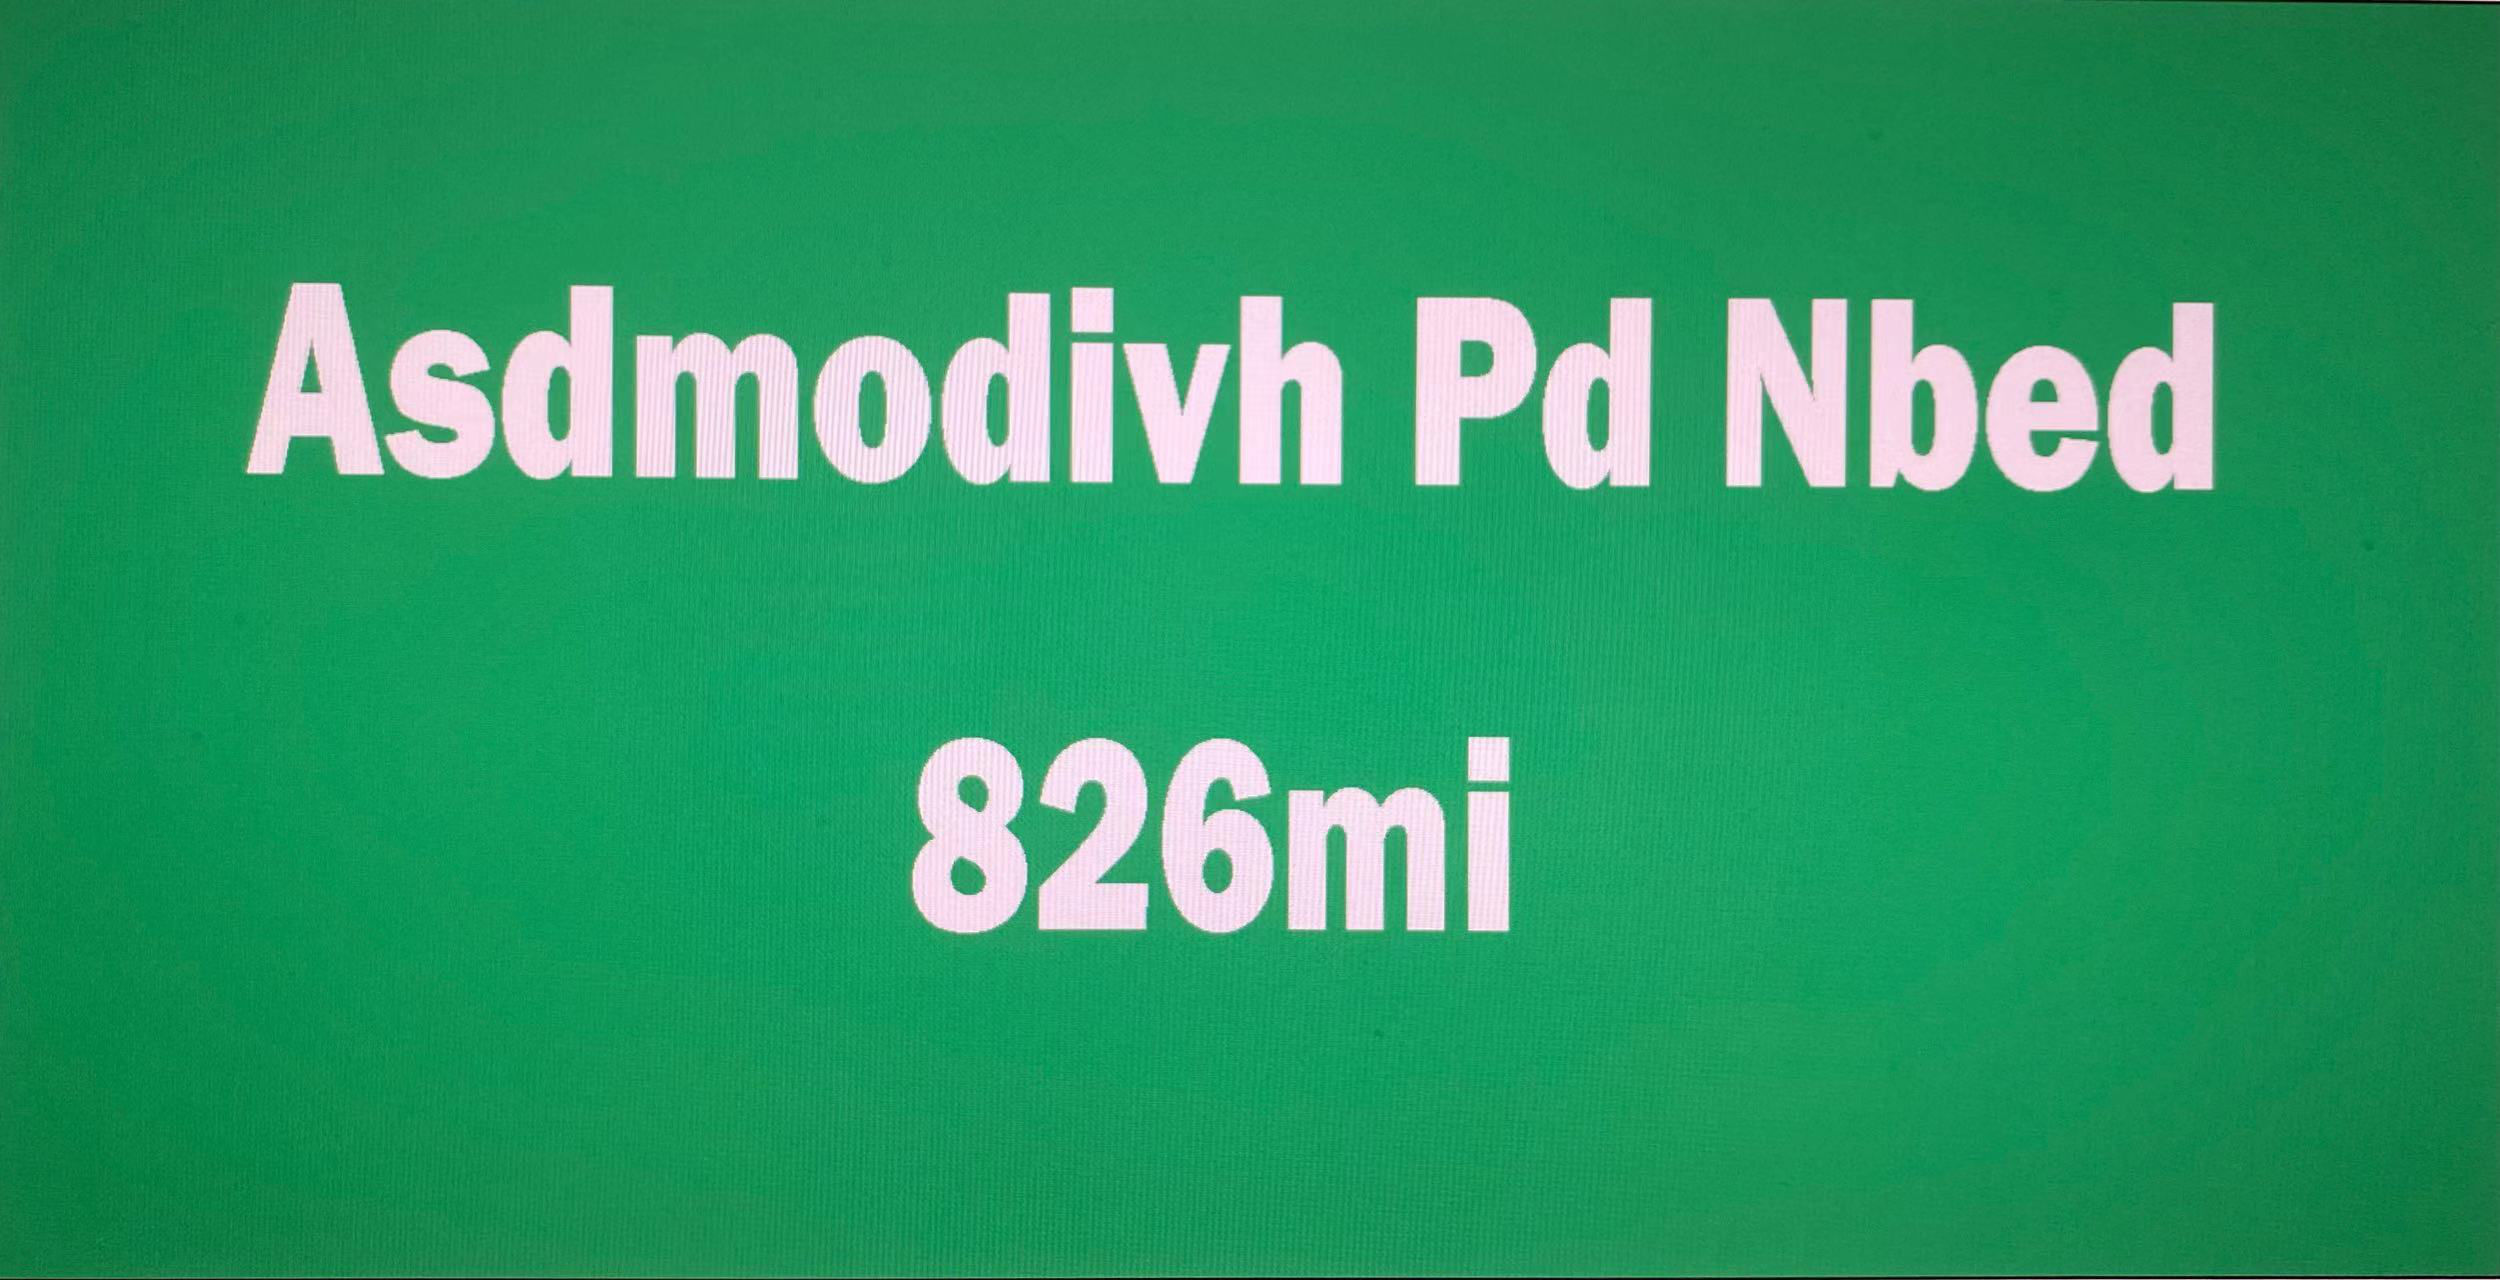

In [ ]:
image = Image.open(file)
display(image)

In [ ]:
import boto3
import numpy as np

In [ ]:
client = boto3.client('rekognition')

In [ ]:
def extract_texts(image):
    try:
        response = client.detect_text(
            Image={
                'S3Object': {
                    'Bucket': 'qtm350projectimage',
                    'Name': image
                }
            }
        )
        text1 = response['TextDetections'][0]['DetectedText']
        text2 = response['TextDetections'][1]['DetectedText']
        confidence1 = response['TextDetections'][0]['Confidence']
        confidence2 = response['TextDetections'][1]['Confidence']
    except Exception:
        text1 = np.nan
        text2 = np.nan
        confidence1 = np.nan
        confidence2 = np.nan
    return text1, text2, confidence1, confidence2

In [ ]:
def extract_confidence(image, line_num):
    try:
        response = client.detect_text(
            Image={
                'S3Object': {
                    'Bucket': 'qtm350projectimage',
                    'Name': image
                }
            }
        )
        confidence = response['TextDetections'][line_num-1]['Confidence']
    except Exception:
        confidence = np.nan
    return confidence

# Construct dataframe

In [ ]:
s3_resource = boto3.resource('s3')
my_bucket = s3_resource.Bucket('qtm350projectimage')
summaries = my_bucket.objects.all()
image_names = [image.key for image  in summaries]

['B+0.jpg',
 'B+10.jpg',
 'B+100.jpg',
 'B+15.jpg',
 'B+20.jpg',
 'B+25.jpg',
 'B+30.jpg',
 'B+35.jpg',
 'B+40.jpg',
 'B+45.jpg',
 'B+5.jpg',
 'B+50.jpg',
 'B+55.jpg',
 'B+60.jpg',
 'B+65.jpg',
 'B+70.jpg',
 'B+75.jpg',
 'B+80.jpg',
 'B+85.jpg',
 'B+90.jpg',
 'B+95.jpg',
 'L+100.jpg',
 'L+125.jpg',
 'L+150.jpg',
 'L+175.jpg',
 'L+200.jpg',
 'L+225.jpg',
 'L+25.jpg',
 'L+250.jpg',
 'L+275.jpg',
 'L+300.jpg',
 'L+50.jpg',
 'L+75.jpg',
 'L-0.jpg',
 'L-100.jpg',
 'L-125.jpg',
 'L-150.jpg',
 'L-175.jpg',
 'L-200.jpg',
 'L-225.jpg',
 'L-25.jpg',
 'L-250.jpg',
 'L-275.jpg',
 'L-300.jpg',
 'L-50.jpg',
 'L-75.jpg',
 'P+0.jpg',
 'P+10.jpg',
 'P+100.jpg',
 'P+110.jpg',
 'P+120.jpg',
 'P+130.jpg',
 'P+140.jpg',
 'P+150.jpg',
 'P+160.jpg',
 'P+170.jpg',
 'P+180.jpg',
 'P+190.jpg',
 'P+20.jpg',
 'P+200.jpg',
 'P+210.jpg',
 'P+220.jpg',
 'P+230.jpg',
 'P+240.jpg',
 'P+250.jpg',
 'P+260.jpg',
 'P+270.jpg',
 'P+280.jpg',
 'P+290.jpg',
 'P+30.jpg',
 'P+300.jpg',
 'P+40.jpg',
 'P+50.jpg',
 'P+60.jpg',
 '

In [ ]:
import pandas as pd
df = pd.DataFrame({'Name':image_names})

In [ ]:
df['type'] = df['Name'].str.replace('.jpg', '').str[0]

In [ ]:
df['level'] = df['Name'].str.replace('.jpg', '').str[1:].astype('float')

In [ ]:
df['info'] = df['Name'].apply(extract_texts)

In [ ]:
df['text1'] = df['info'].apply(lambda x : x[0])
df['text2'] = df['info'].apply(lambda x : x[1])
df['confidence1'] = df['info'].apply(lambda x : x[2])
df['confidence2'] = df['info'].apply(lambda x : x[3])
del df['info']

In [ ]:
df

,Name,type,level,text1,text2,confidence1,confidence2
0,B+0.jpg,B,0.0,Asdmodivh Pd Nbed,826mi,99.282143,99.517410
1,B+10.jpg,B,10.0,Asdmodivh Pd Nbed,826mi,98.851898,99.284851
2,B+100.jpg,B,100.0,NaN,NaN,NaN,NaN
3,B+15.jpg,B,15.0,Asdmodivh Pd Nbed,826mi,98.605553,98.787895
4,B+20.jpg,B,20.0,Asdmodivi Pd Nbed,826ml,85.018639,81.131485
...,...,...,...,...,...,...,...
72,P+50.jpg,P,50.0,Asdmodivh Pd Nbed,826mi,99.253128,99.498619
73,P+60.jpg,P,60.0,Asdmodivh Pd Nbed,826mi,99.366394,99.470993
74,P+70.jpg,P,70.0,Asdmodivh Pd Nbed,826mi,99.343834,99.457985
75,P+80.jpg,P,80.0,Asdmodivh Pd Nbed,826mi,99.399239,99.732361


In [ ]:
import pandas as pd
df = pd.read_csv ('initial_analysis.csv')
print (df)

    Unnamed: 0       Name type  ...  confidence1 confidence2 confidence
0            0    B+0.jpg    B  ...    99.282143   99.517410  99.335613
1            1   B+10.jpg    B  ...    99.246765   99.593315  99.325526
2            2  B+100.jpg    B  ...     0.000000    0.000000   0.000000
3            3   B+15.jpg    B  ...    99.177582   99.667999  99.289040
4            4   B+20.jpg    B  ...    99.113754   99.401932  99.179249
..         ...        ...  ...  ...          ...         ...        ...
72          72   P+50.jpg    P  ...    99.253128   99.498619  99.308921
73          73   P+60.jpg    P  ...    99.366394   99.470993  99.390167
74          74   P+70.jpg    P  ...    99.343834   99.457985  99.369777
75          75   P+80.jpg    P  ...    99.399239   99.732361  99.474948
76          76   P+90.jpg    P  ...    99.320206   99.607597  99.385522

[77 rows x 9 columns]


In [ ]:
text1_len = len('Asdmodivh Pd Nbed')
text2_len = len('826mi')
weight1 = text1_len/(text1_len + text2_len)
weight2 = text2_len/(text1_len + text2_len)
df['confidence'] = df['confidence1']*weight1 + df['confidence2']*weight2

In [ ]:
df

,Unnamed: 0,Name,type,level,text1,text2,confidence1,confidence2,confidence
0,0,B+0.jpg,B,0.0,Asdmodivh Pd Nbed,826mi,99.282143,99.517410,99.335613
1,1,B+10.jpg,B,10.0,Asdmodivh Pd Nbed,826mi,99.246765,99.593315,99.325526
3,3,B+15.jpg,B,15.0,Asdmodivh Pd Nbed,826mi,99.177582,99.667999,99.289040
4,4,B+20.jpg,B,20.0,Asdmodivh Pd Nbed,826mi,99.113754,99.401932,99.179249
5,5,B+25.jpg,B,25.0,Asdmodivh Pd Nbed,826mi,98.980293,99.327866,99.059287
...,...,...,...,...,...,...,...,...,...
72,72,P+50.jpg,P,50.0,Asdmodivh Pd Nbed,826mi,99.253128,99.498619,99.308921
73,73,P+60.jpg,P,60.0,Asdmodivh Pd Nbed,826mi,99.366394,99.470993,99.390167
74,74,P+70.jpg,P,70.0,Asdmodivh Pd Nbed,826mi,99.343834,99.457985,99.369777
75,75,P+80.jpg,P,80.0,Asdmodivh Pd Nbed,826mi,99.399239,99.732361,99.474948


### Lighting dataframe

In [ ]:
df_L = df.loc[df['type']=='L'].sort_values('level')
df_L

,Unnamed: 0,Name,type,level,text1,text2,confidence1,confidence2,confidence
43,43,L-300.jpg,L,-300.0,Asdmodivh Pd Nbed,826mi,99.262520,99.477020,99.311270
42,42,L-275.jpg,L,-275.0,Asdmodivh Pd Nbed,826mi,99.379105,99.601242,99.429590
41,41,L-250.jpg,L,-250.0,Asdmodivh Pd Nbed,826mi,99.358658,99.662537,99.427721
39,39,L-225.jpg,L,-225.0,Asdmodivh Pd Nbed,826mi,99.305710,99.650864,99.384154
38,38,L-200.jpg,L,-200.0,Asdmodivh Pd Nbed,826mi,99.390915,99.655891,99.451137
37,37,L-175.jpg,L,-175.0,Asdmodivh Pd Nbed,826mi,99.323883,99.643150,99.396444
36,36,L-150.jpg,L,-150.0,Asdmodivh Pd Nbed,826mi,99.258247,99.544945,99.323406
35,35,L-125.jpg,L,-125.0,Asdmodivh Pd Nbed,826mi,99.267807,99.564621,99.335265
34,34,L-100.jpg,L,-100.0,Asdmodivh Pd Nbed,826mi,99.315056,99.521095,99.361883
45,45,L-75.jpg,L,-75.0,Asdmodivh Pd Nbed,826mi,99.255356,99.674194,99.350546


### Particle dataframe

In [ ]:
df_P = df.loc[df['type']=='P'].sort_values('level')
df_P

,Unnamed: 0,Name,type,level,text1,text2,confidence1,confidence2,confidence
46,46,P+0.jpg,P,0.0,Asdmodivh Pd Nbed,826mi,99.282143,99.517410,99.335613
47,47,P+10.jpg,P,10.0,Asdmodivh Pd Nbed,826mi,99.319389,99.521599,99.365346
58,58,P+20.jpg,P,20.0,Asdmodivh Pd Nbed,826mi,99.281029,99.542923,99.340550
69,69,P+30.jpg,P,30.0,Asdmodivh Pd Nbed,826mi,99.264496,99.556183,99.330788
71,71,P+40.jpg,P,40.0,Asdmodivh Pd Nbed,826mi,99.323929,99.583908,99.383015
72,72,P+50.jpg,P,50.0,Asdmodivh Pd Nbed,826mi,99.253128,99.498619,99.308921
73,73,P+60.jpg,P,60.0,Asdmodivh Pd Nbed,826mi,99.366394,99.470993,99.390167
74,74,P+70.jpg,P,70.0,Asdmodivh Pd Nbed,826mi,99.343834,99.457985,99.369777
75,75,P+80.jpg,P,80.0,Asdmodivh Pd Nbed,826mi,99.399239,99.732361,99.474948
76,76,P+90.jpg,P,90.0,Asdmodivh Pd Nbed,826mi,99.320206,99.607597,99.385522


### Blurring dataframe

In [ ]:
df_B = df.loc[df['type']=='B'].sort_values('level')
df_B

,Unnamed: 0,Name,type,level,text1,text2,confidence1,confidence2,confidence
0,0,B+0.jpg,B,0.0,Asdmodivh Pd Nbed,826mi,99.282143,99.517410,99.335613
10,10,B+5.jpg,B,5.0,Asdmodivh Pd Nbed,826mi,99.303215,99.503006,99.348622
1,1,B+10.jpg,B,10.0,Asdmodivh Pd Nbed,826mi,99.246765,99.593315,99.325526
3,3,B+15.jpg,B,15.0,Asdmodivh Pd Nbed,826mi,99.177582,99.667999,99.289040
4,4,B+20.jpg,B,20.0,Asdmodivh Pd Nbed,826mi,99.113754,99.401932,99.179249
5,5,B+25.jpg,B,25.0,Asdmodivh Pd Nbed,826mi,98.980293,99.327866,99.059287
6,6,B+30.jpg,B,30.0,Asdmodivh Pd Nbed,826mi,98.811676,99.336960,98.931059
7,7,B+35.jpg,B,35.0,Asdmodivh Pd Nbed,826mi,98.734512,99.188927,98.837788
8,8,B+40.jpg,B,40.0,Asdmodivh Pd Nbed,826mi,98.694695,98.701851,98.696321
9,9,B+45.jpg,B,45.0,Asdmodivh Pd Nbed,826mi,97.093338,63.877773,89.544346


# Regression Analysis
## Relation between level and confidence

In [ ]:
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt

### Linear regression for particle value

In [ ]:
results = smf.ols('confidence ~ level', data=df_P).fit()

##### Visualization

Text(0.5, 1.0, 'Particle Value and Confidence')

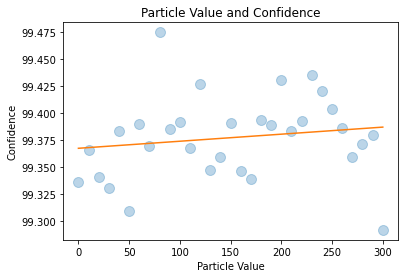

In [ ]:
plt.plot(df_P['level'], df_P['confidence'], 'o', alpha=0.3, markersize=10)
plt.plot(df_P['level'], results.predict(df_P['level']))
plt.xlabel('Particle Value')
plt.ylabel('Confidence')
plt.title("Particle Value and Confidence")

##### Result of Linear Regression

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             confidence   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.7225
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.402
Time:                        03:20:09   Log-Likelihood:                 58.134
No. Observations:                  31   AIC:                            -112.3
Df Residuals:                      29   BIC:                            -109.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.3673      0.013   7387.521      0.0

### Linear regression for blurring value

In [ ]:
results = smf.ols('confidence ~ level', data=df_B).fit()

##### Visualization

Text(0.5, 1.0, 'Blurring Value and Confidence')

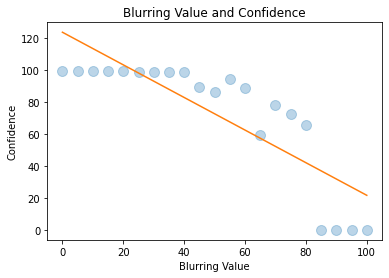

In [ ]:
plt.plot(df_B['level'], df_B['confidence'], 'o', alpha=0.3, markersize=10)
plt.plot(df_B['level'], results.predict(df_B['level']))
plt.xlabel('Blurring Value')
plt.ylabel('Confidence')
plt.title("Blurring Value and Confidence")

##### Result of Linear Regression

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             confidence   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     43.15
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.74e-06
Time:                        03:20:09   Log-Likelihood:                -93.228
No. Observations:                  21   AIC:                             190.5
Df Residuals:                      19   BIC:                             192.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    123.6922      9.080     13.622      0.0

In [ ]:
df_B_40 = df_B[df_B['level']>40]
results = smf.ols('confidence ~ level', data=df_B_40).fit()

##### Visualization

Text(0.5, 1.0, 'Blurring Value and Confidence')

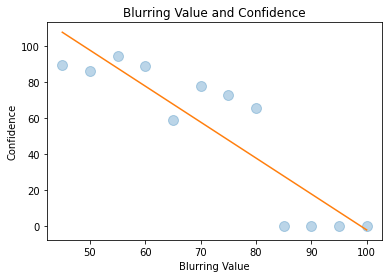

In [ ]:
plt.plot(df_B_40['level'], df_B_40['confidence'], 'o', alpha=0.3, markersize=10)
plt.plot(df_B_40['level'], results.predict(df_B_40['level']))
plt.xlabel('Blurring Value')
plt.ylabel('Confidence')
plt.title("Blurring Value and Confidence")

##### Result of Linear Regression

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             confidence   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     38.79
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           9.78e-05
Time:                        03:20:09   Log-Likelihood:                -51.350
No. Observations:                  12   AIC:                             106.7
Df Residuals:                      10   BIC:                             107.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    197.3318     23.847      8.275      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


### Linear regression for lighting value

In [ ]:
results = smf.ols('confidence ~ level', data=df_L).fit()

##### Visualization

Text(0.5, 1.0, 'Lighting Value and Confidence')

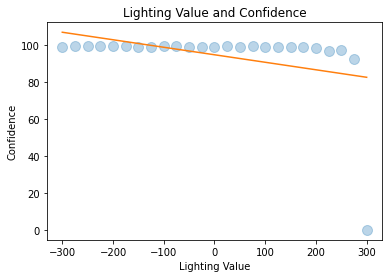

In [ ]:
plt.plot(df_L['level'], df_L['confidence'], 'o', alpha=0.3, markersize=10)
plt.plot(df_L['level'], results.predict(df_L['level']))
plt.xlabel('Lighting Value')
plt.ylabel('Confidence')
plt.title("Lighting Value and Confidence")

##### Result of Linear Regression

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             confidence   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     3.824
Date:                Tue, 30 Nov 2021   Prob (F-statistic):             0.0628
Time:                        03:20:09   Log-Likelihood:                -107.70
No. Observations:                  25   AIC:                             219.4
Df Residuals:                      23   BIC:                             221.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.8737      3.749     25.309      0.0

#### Linear regression for positive lighting value



In [ ]:
df_L_pos = df_L[df_L['level']>0]
results = smf.ols('confidence ~ level', data=df_L_pos).fit()

##### Visualization

Text(0.5, 1.0, 'Positive Lighting Value and Confidence')

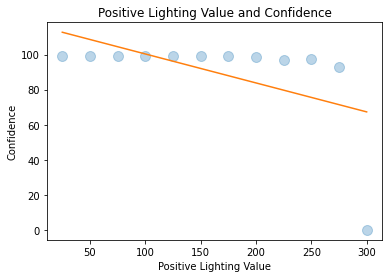

In [ ]:
plt.plot(df_L_pos['level'], df_L_pos['confidence'], 'o', alpha=0.3, markersize=10)
results = smf.ols('confidence ~ level', data=df_L_pos).fit()
plt.plot(df_L_pos['level'], results.predict(df_L_pos['level']))
plt.xlabel('Positive Lighting Value')
plt.ylabel('Confidence')
plt.title("Positive Lighting Value and Confidence")

##### Result of Linear Regression

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             confidence   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     3.785
Date:                Tue, 30 Nov 2021   Prob (F-statistic):             0.0803
Time:                        03:20:10   Log-Likelihood:                -54.739
No. Observations:                  12   AIC:                             113.5
Df Residuals:                      10   BIC:                             114.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.8411     15.618      7.481      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


#### Linear regression for negative lighting value

In [ ]:
df_L_neg = df_L[df_L['level']<0]
results = smf.ols('confidence ~ level', data=df_L_neg).fit()

##### Visualization

Text(0.5, 1.0, 'Negative Lighting Value and Confidence')

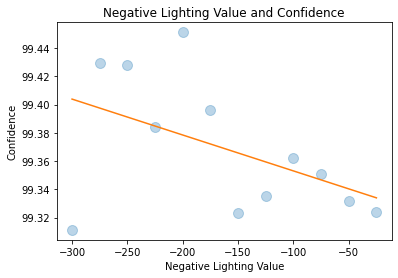

In [ ]:
plt.plot(df_L_neg['level'], df_L_neg['confidence'], 'o', alpha=0.3, markersize=10)
results = smf.ols('confidence ~ level', data=df_L_neg).fit()
plt.plot(df_L_neg['level'], results.predict(df_L_neg['level']))
plt.xlabel('Negative Lighting Value')
plt.ylabel('Confidence')
plt.title("Negative Lighting Value and Confidence")

##### Result of Linear Regression

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             confidence   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     2.964
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.116
Time:                        03:20:10   Log-Likelihood:                 21.517
No. Observations:                  12   AIC:                            -39.03
Df Residuals:                      10   BIC:                            -38.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.3276      0.027   3658.089      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


### Conclusion

In [ ]:
data = {'Type':['Particle Value','Blurring Value','Positive Lighting Value','Negative Lighting Value'],'Coefficient':[6.546e-05,-1.0204,-0.1651,-0.0003]}
frame = pd.DataFrame(data)
frame

,Type,Coefficient
0,Particle Value,0.000065
1,Blurring Value,-1.020400
2,Positive Lighting Value,-0.165100
3,Negative Lighting Value,-0.000300


In [ ]:
!aws s3 ls

/bin/bash: aws: command not found


In [ ]:
# !aws s3 mb s3://dataframe-storage

In [ ]:
# !aws s3 cp initial_analysis.csv s3://dataframe-storage/initial_analysis.csv

## Authors Introduction
We are 5 senior students at Emory University taking QTM350 - Data Science Computing class. Our team members are:  Audrey Gong, Cecilia Ting, Duping Gao, Edward Chen, and Lizzy Fang. 

### Meet our team!!

Hi, my name is Xindi Gong, and I also go by Audrey. I am a senior stuent majoring in AMS. You can find me on [Instagram](https://www.instagram.com/xindigong/) or [Linkedin](https://www.linkedin.com/in/xindi-gong-80273b1b9/).
<center>
<img src="https://drive.google.com/uc?id=1vz4SknCzzIwyq4xT523_y2nrE1B0XnV0" alt="https://drive.google.com/uc?id=1vz4SknCzzIwyq4xT523_y2nrE1B0XnV0" width="350" />
<div align="left">  

Hi I'm Yujan Ting, and I also go by Cecilia. I'm a senior majoring in AMS and Computer Science. I come from Kunming, a beautiful city in the southwest China , and I also come from Taiwan. I'm a dog person who has three dogs. You can find me on [Instagram](https://www.instagram.com/yujant_/) here!

<center>
<img src="https://drive.google.com/uc?export=view&id=1aZ48EBdMXXV--VqCHMPraqRwuQRHaPCs" alt="https://drive.google.com/uc?export=view&id=1aZ48EBdMXXV--VqCHMPraqRwuQRHaPCs" width="300" />
<div align="left">

Hello, I'm Duping Gao. Currently I am in Beijing, China, which is also my hometown. I'm now a Senior majored Appiled Math & Stats and Economics. I hope I can learn more about cloud computing and related data science knowledge from this course. Here is my [Instagram account](https://www.instagram.com/duping_gao/), and I always share my recent life there. Follow me if you want!
<center>
<img src="https://drive.google.com/uc?id=1UgMIodi4nCgfkTS-hkQK-XDEozA_vdGb" alt="https://drive.google.com/uc?id=1UgMIodi4nCgfkTS-hkQK-XDEozA_vdGb" width="200" />
<div align="left">  

Hi, my name is Edward Chen. I am currently a senior student in Emory University My major is AMS, and I also minor in Economics. Below is my favourite game, League of Legends.

Hey I am Lizzy Fang, a senior student majoring in QSS Econ track. I am originally from Beijing China, and in my free time, I love indoor climbing, reading, HBO and gaming. You can find my [Instagram](https://www.instagram.com/lizbittersweet/) here!

<center>
<img src="https://drive.google.com/uc?id=1wB3LUJUcH-UVTveXxP6t8c_rDwnTKOuj" alt="https://drive.google.com/uc?id=1wB3LUJUcH-UVTveXxP6t8c_rDwnTKOuj" width="350" />
<div align="left">


